In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

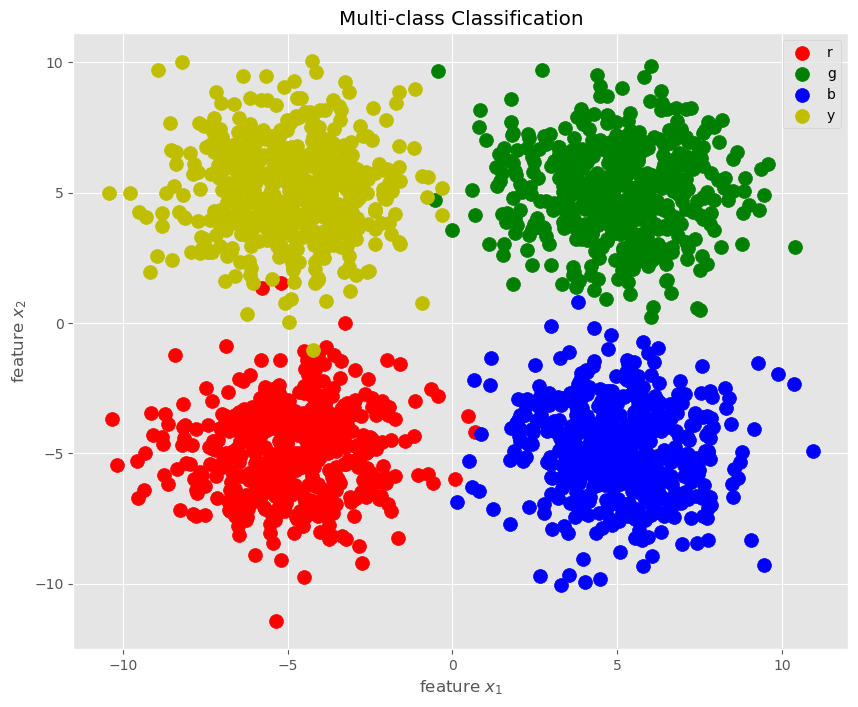

In [5]:
cp = 5
nclasses = 2
mean1 = [-cp, -cp]
mean2 = [cp, cp]
mean3 = [cp, -cp]
mean4 = [-cp, cp]
cov = [[3.0, 0.0], [0.0, 3.0]]

# Create some points for the training set...
nexamples = 2000
x1 = np.random.multivariate_normal(mean1, cov, nexamples // 4)
x2 = np.random.multivariate_normal(mean2, cov, nexamples // 4)
x3 = np.random.multivariate_normal(mean3, cov, nexamples // 4)
x4 = np.random.multivariate_normal(mean4, cov, nexamples // 4)

X = np.vstack((x1, x2, x3, x4))
Y = np.vstack((1 * np.ones((nexamples // 4, 1)),
               2 * np.ones((nexamples // 4, 1)),
               3 * np.ones((nexamples // 4, 1)),
               4 * np.ones((nexamples // 4, 1))))

# Visualize the data
plt.scatter(x1[:, 0], x1[:, 1], c='r', s=100)
plt.scatter(x2[:, 0], x2[:, 1], c='g', s=100)
plt.scatter(x3[:, 0], x3[:, 1], c='b', s=100)
plt.scatter(x4[:, 0], x4[:, 1], c='y', s=100)

plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r', 'g', 'b', 'y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg', format='svg')

# Create some points for the test set
ntexamples = 1000
x1 = np.random.multivariate_normal(mean1, cov, ntexamples // 4)
x2 = np.random.multivariate_normal(mean2, cov, ntexamples // 4)
x3 = np.random.multivariate_normal(mean3, cov, ntexamples // 4)
x4 = np.random.multivariate_normal(mean4, cov, ntexamples // 4)

Xt = np.vstack((x1, x2, x3, x4))
Yt = np.vstack((1 * np.ones((ntexamples // 4, 1)),
                2 * np.ones((ntexamples // 4, 1)),
                3 * np.ones((ntexamples // 4, 1)),
                4 * np.ones((ntexamples // 4, 1))))


In [6]:
import randomForest as rf

In [7]:
rfc=rf.RandomForest(weaklearner='Linear')

In [9]:
print( X.shape, Y.shape)

(2000, 2) (2000, 1)


In [10]:
%pdb
rfc.train(X,Y)

Automatic pdb calling has been turned ON


In [11]:
len(rfc.trees)

10

In [13]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]


Predicted,1,All
Actual,,
1.0,500,500
2.0,500,500
3.0,500,500
4.0,500,500
All,2000,2000


In [14]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]
C:\Users\user\Desktop\Files\University\ML\Assignment\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


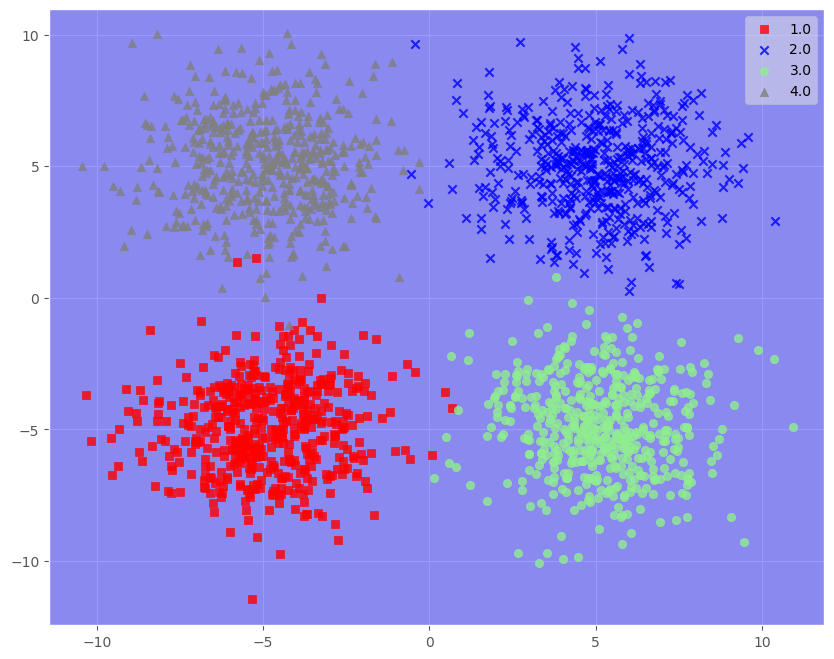

In [15]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [17]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1,All
Actual,,
1.0,250,250
2.0,250,250
3.0,250,250
4.0,250,250
All,1000,1000


In [19]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

C:\Users\user\Desktop\Files\University\ML\Assignment\A4\randomForest.py:179: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_predictions = mode(predictions, axis=0).mode[0]
C:\Users\user\Desktop\Files\University\ML\Assignment\A4\tools.py:699: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y==c, 0],


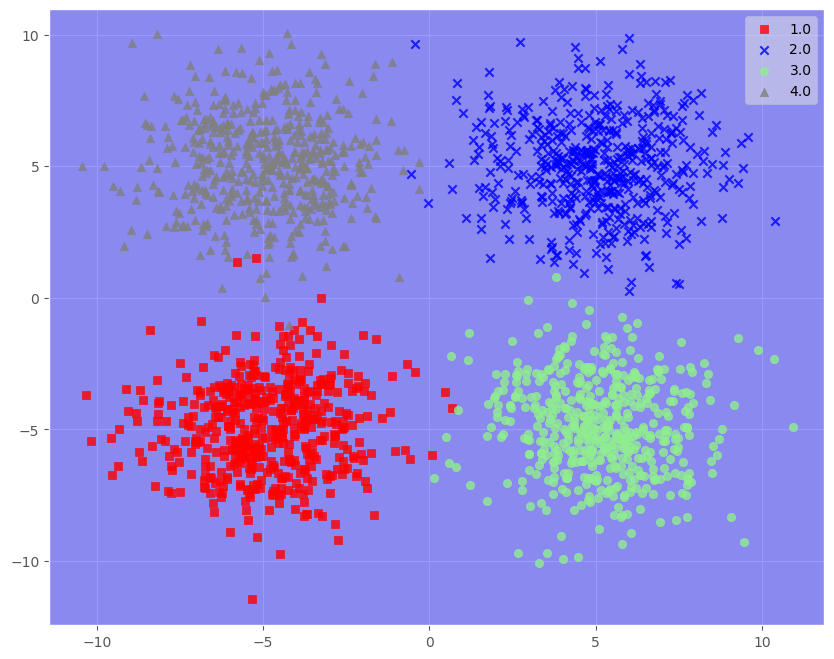

In [20]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned ON
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


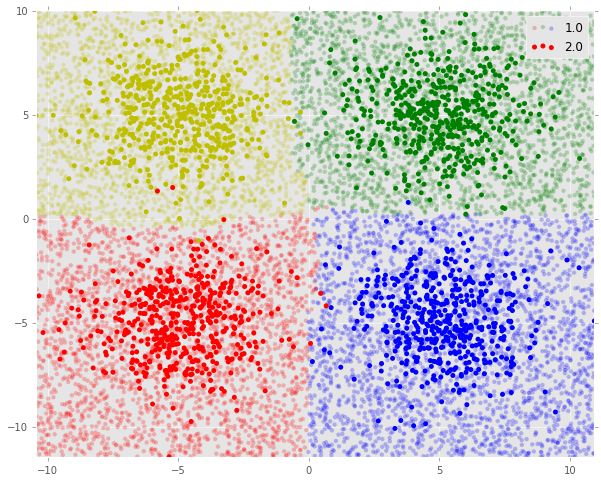

In [16]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

In [ ]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

## Lets Run on Nonlinear Data, The Spherical Examples...

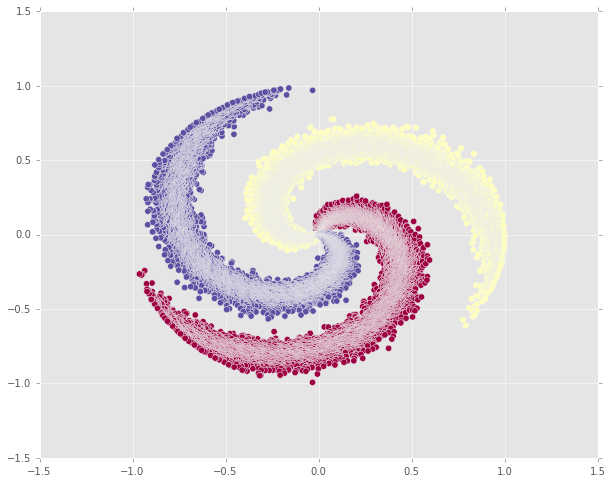

In [18]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [19]:
print X.shape, Y.shape

(30000, 2) (30000,)


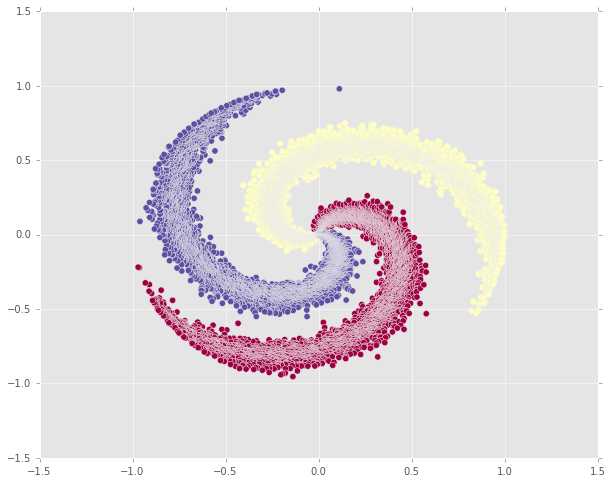

In [20]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [21]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

Creating Left Child Node With 7616 Examples, and Right Node with 22384 Examples
Creating Left Child Node With 3593 Examples, and Right Node with 4023 Examples
Creating Left Child Node With 2384 Examples, and Right Node with 1209 Examples
Creating Left Child Node With 1968 Examples, and Right Node with 416 Examples
Creating Child Node With ClassLabel=0, nexamples=1968, classes=[(0, 1968)]
Creating Child Node With ClassLabel=0, nexamples=416, classes=[(0, 403), (1, 13)]
Creating Left Child Node With 696 Examples, and Right Node with 513 Examples
Creating Child Node With ClassLabel=0, nexamples=696, classes=[(0, 696)]
Creating Child Node With ClassLabel=1, nexamples=513, classes=[(1, 513)]
Creating Left Child Node With 976 Examples, and Right Node with 3047 Examples
Creating Left Child Node With 0 Examples, and Right Node with 976 Examples
Creating Child Node With ClassLabel=0, nexamples=976, classes=[(0, 976)]
Creating Left Child Node With 6 Examples, and Right Node with 3041 Examples
Cr

In [22]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9847,14,139,10000
1,533,9467,0,10000
2,798,51,9151,10000
All,11178,9532,9290,30000


In [23]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4927,4,69,5000
1,282,4718,0,5000
2,404,24,4572,5000
All,5613,4746,4641,15000


In [24]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

(10000, 2)
[0, 1, 2]


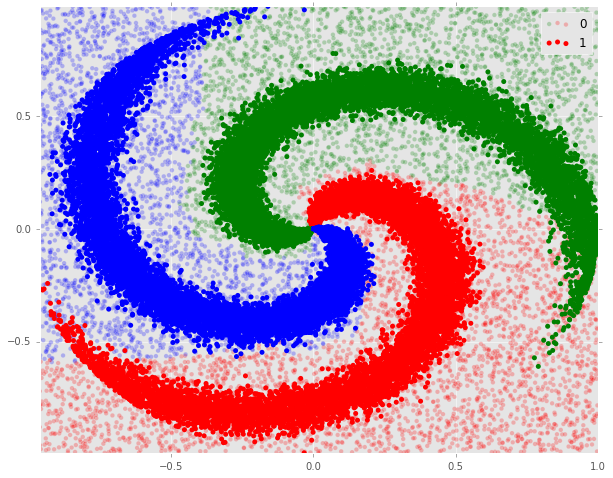

In [25]:
t.plot_points_range(rfc,X,Y)

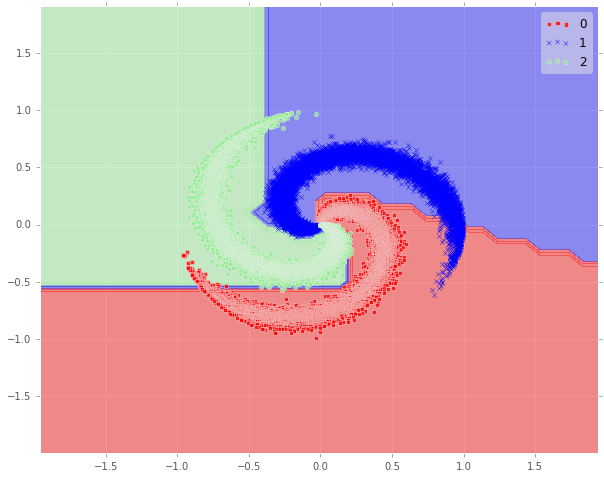

In [26]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

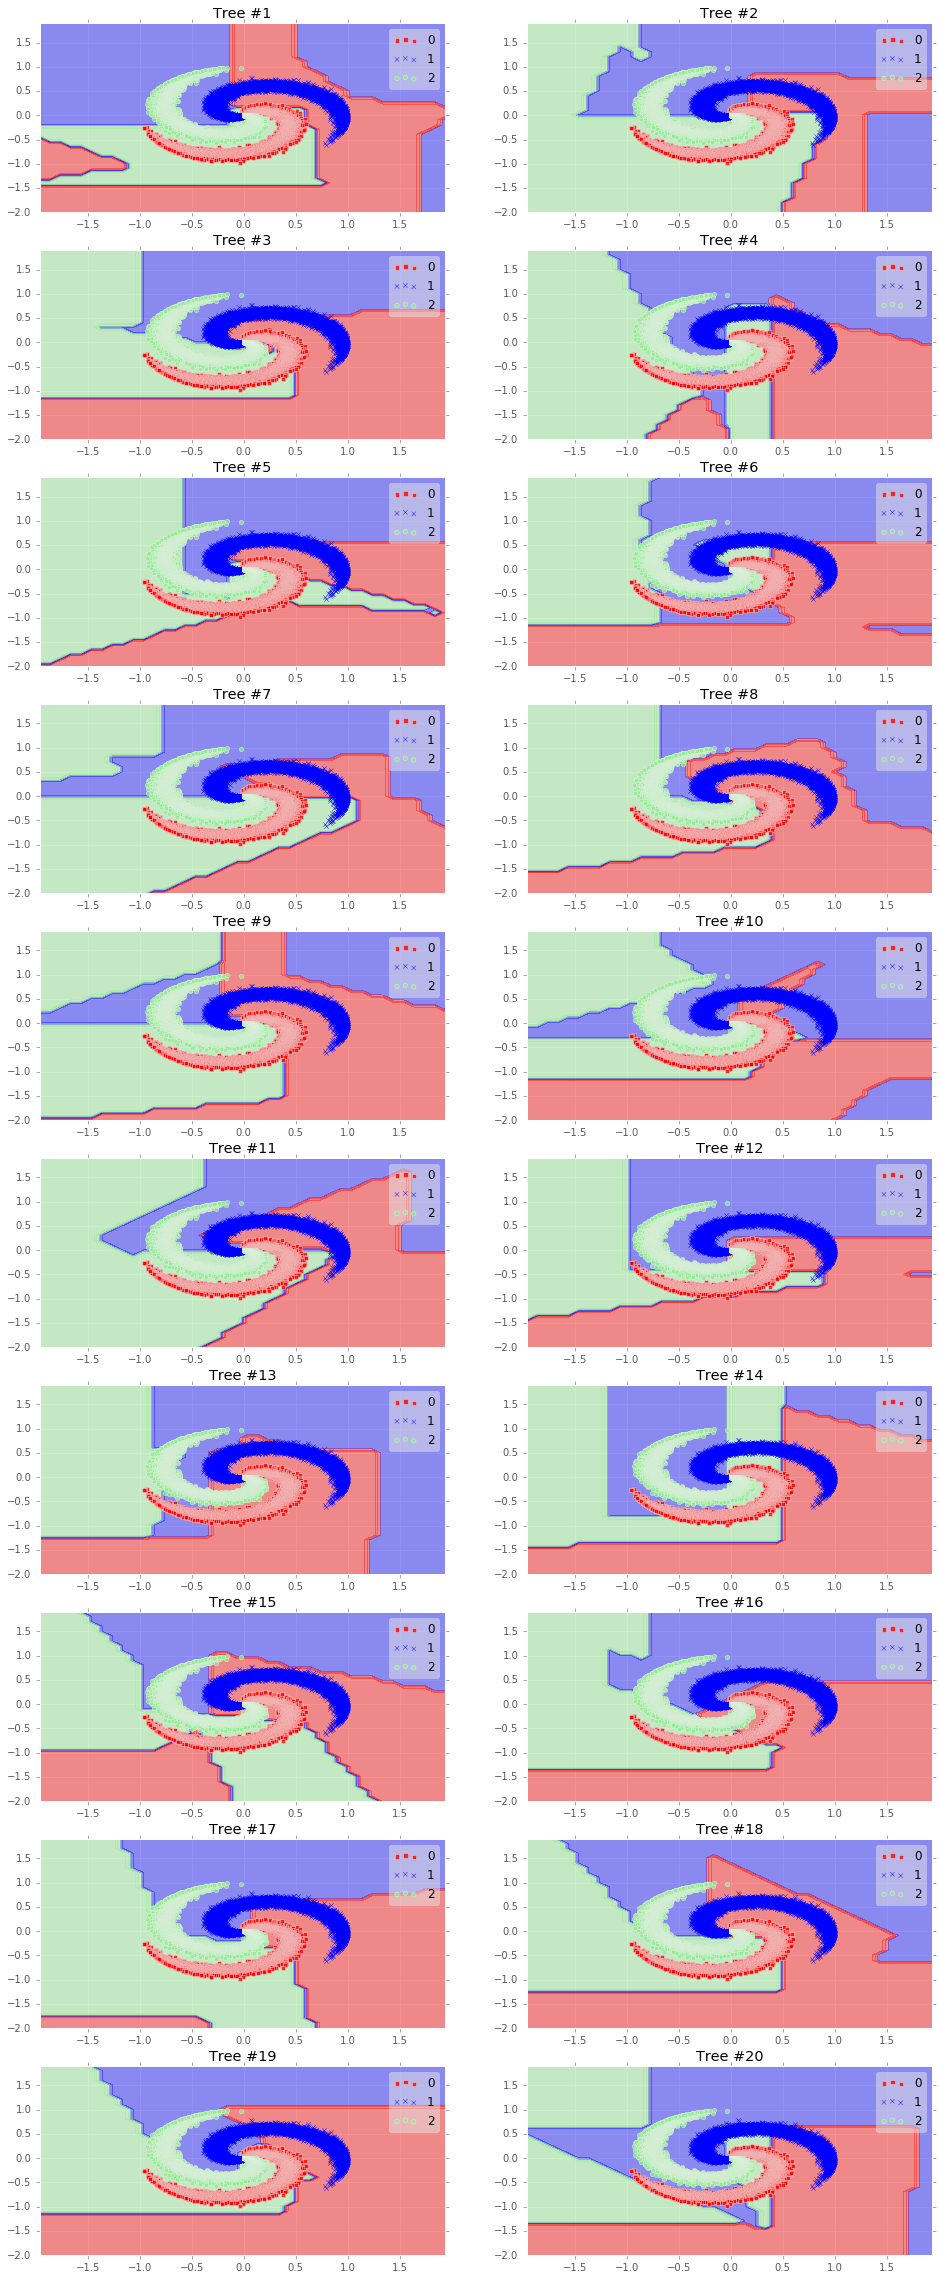

In [27]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    